<a href="https://colab.research.google.com/github/OnkarMate06/OnkarMate06/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [158]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

# **RFM Segmentation**
Data Gathering 

In [4]:
sales_data = pd.read_excel('/content/drive/MyDrive/sales_data.xlsx')

In [5]:
sales_data.head(5)

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [6]:
# getting information about dataframe 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [7]:
# checking number of rows and column 
sales_data.shape

(5000, 40)

Data Wrangling/ Pre profilling/ Manging 
1. Check duplicates
2. Check null values 
3. Correcting format 
4. data bining 

In [8]:
# droping duplicates if present 
sales_data.CustomerID.drop_duplicates(inplace=True)

In [33]:
# here we notice that there is no duplicate present in the dataframe
sales_data.shape

(5000, 41)

In [9]:
#checking the missing value in data frame 
sales_data.isnull().sum(axis=0)

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [10]:
#convert string data field into date time 
sales_data['LATEST_ORDER_DATE']= pd.to_datetime(sales_data['LATEST_ORDER_DATE'])
sales_data['FIRST_ORDER_DATE']= pd.to_datetime(sales_data['FIRST_ORDER_DATE'])
sales_data['timeperiod']=sales_data['LATEST_ORDER_DATE']-sales_data['FIRST_ORDER_DATE']
sales_data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,timeperiod
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1759 days
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,1303 days
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,1424 days
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,929 days
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,366 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,1,0,0.00,0.00,117.49,0.00,0 days


We have Large range of customer so we catagorize them according to RFM 

In [11]:
#calculatinf RFM score which was already available in given data sheet
#considering that columnm anly and rebnaming it 
RFMScore = sales_data[['CustomerID','DAYSSINCELASTORDER','TOTAL_ORDERS','REVENUE']]
RFMScore.rename(columns = {'DAYSSINCELASTORDER' : 'Recency', 'TOTAL_ORDERS' : 'Frequency','REVENUE' : 'Monetry'}, inplace = True)
RFMScore.set_index('CustomerID',inplace=True)
RFMScore

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Recency,Frequency,Monetry
CustomerID,,,
22,1,124,11986.54
29,1,82,11025.96
83,1,43,7259.69
95,1,44,6992.27
124,1,55,6263.44
...,...,...,...
173946,207,1,117.49
173987,207,1,117.49
174004,207,1,117.49


In [12]:
# RFM score quantiles into 4 group
quantiles = RFMScore.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 7.0, 0.5: 68.0, 0.75: 171.25},
 'Frequency': {0.25: 3.0, 0.5: 8.0, 0.75: 20.0},
 'Monetry': {0.25: 315.09749999999997, 0.5: 966.725, 0.75: 2493.0725}}

In [13]:
#ranking that RFM score into 4 
# in recency 1 rank is top customer who recently buy 
# in Frequency 1 rank is top customer frequency
# in MOnetry 1 rank is top customer buying amount
def Rscoring (a,b,c):
  if a <= b[c][0.25]:
    return 1
  elif a <= b[c][0.5]:
    return 2
  elif a <= b[c][0.75]:
    return 3
  else :
    return 4

def FnMscoring (a,b,c):
  if a <= b[c][0.25]:
    return 4
  elif a <= b[c][0.5]:
    return 3
  elif a <= b[c][0.75]:
    return 2
  else :
    return 1



In [14]:
# adding individual column for R, F & M by ranking them into 4 point rating 
RFMScore['R'] = RFMScore['Recency'].apply(Rscoring,args=(quantiles,'Recency',))
RFMScore['F'] = RFMScore['Frequency'].apply(FnMscoring,args=(quantiles,'Frequency',))
RFMScore['M'] = RFMScore['Monetry'].apply(FnMscoring,args=(quantiles,'Monetry',))
RFMScore

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Recency,Frequency,Monetry,R,F,M
CustomerID,,,,,,
22,1,124,11986.54,1,1,1
29,1,82,11025.96,1,1,1
83,1,43,7259.69,1,1,1
95,1,44,6992.27,1,1,1
124,1,55,6263.44,1,1,1
...,...,...,...,...,...,...
173946,207,1,117.49,4,4,4
173987,207,1,117.49,4,4,4
174004,207,1,117.49,4,4,4


In [15]:
# adding new column in RFMScore names RFM_group for eaiser to catogories 
# Adding new column named rfmscore for toatl score calculation 
RFMScore['RFM_group'] = RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore['RFMscore'] = RFMScore[['R','F','M']].sum(axis = 1)
RFMScore

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Recency,Frequency,Monetry,R,F,M,RFM_group,RFMscore
CustomerID,,,,,,,,
22,1,124,11986.54,1,1,1,111,3
29,1,82,11025.96,1,1,1,111,3
83,1,43,7259.69,1,1,1,111,3
95,1,44,6992.27,1,1,1,111,3
124,1,55,6263.44,1,1,1,111,3
...,...,...,...,...,...,...,...,...
173946,207,1,117.49,4,4,4,444,12
173987,207,1,117.49,4,4,4,444,12
174004,207,1,117.49,4,4,4,444,12


In [16]:
# Assigning loyalty level to each customer 
# This will help to understand which customer are churning out and which are loyal 
labelling = ['Champion','Potential_cutomer','Need_attaintion']
Score_cut = pd.qcut(RFMScore.RFMscore, q=3 , labels = labelling)
RFMScore['Customer_level']=Score_cut.values
RFMScore.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,CustomerID,Recency,Frequency,Monetry,R,F,M,RFM_group,RFMscore,Customer_level
0,22,1,124,11986.54,1,1,1,111,3,Champion
1,29,1,82,11025.96,1,1,1,111,3,Champion
2,83,1,43,7259.69,1,1,1,111,3,Champion
3,95,1,44,6992.27,1,1,1,111,3,Champion
4,124,1,55,6263.44,1,1,1,111,3,Champion
...,...,...,...,...,...,...,...,...,...,...
4995,173946,207,1,117.49,4,4,4,444,12,Need_attaintion
4996,173987,207,1,117.49,4,4,4,444,12,Need_attaintion
4997,174004,207,1,117.49,4,4,4,444,12,Need_attaintion
4998,174038,207,1,117.49,4,4,4,444,12,Need_attaintion


# Data Visualization

In [17]:
# Now we plot our data for better understanding of customer behaviour

import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency

graph = RFMScore.query("Monetry < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_level == 'Need_attaintion'")['Recency'],
        y=graph.query("Customer_level == 'Need_attaintion'")['Frequency'],
        mode='markers',
        name='Need_attaintion',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_level == 'Potential_cutomer'")['Recency'],
        y=graph.query("Customer_level == 'Potential_cutomer'")['Frequency'],
        mode='markers',
        name='Potential_cutomer',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_level == 'Champion'")['Recency'],
        y=graph.query("Customer_level == 'Champion'")['Frequency'],
        mode='markers',
        name='Champion',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




In [18]:
# Frequency vs Monetry

graph = RFMScore.query("Monetry < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_level == 'Need_attaintion'")['Frequency'],
        y=graph.query("Customer_level == 'Need_attaintion'")['Monetry'],
        mode='markers',
        name='Need_attaintion',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_level == 'Potential_cutomer'")['Frequency'],
        y=graph.query("Customer_level == 'Potential_cutomer'")['Monetry'],
        mode='markers',
        name='Potential_cutomer',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_level == 'Champion'")['Frequency'],
        y=graph.query("Customer_level == 'Champion'")['Monetry'],
        mode='markers',
        name='Champion',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetry"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




In [19]:
#Recency Vs Monetry

graph = RFMScore.query("Monetry < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_level == 'Need_attaintion'")['Recency'],
        y=graph.query("Customer_level == 'Need_attaintion'")['Monetry'],
        mode='markers',
        name='Need_attaintion',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_level == 'Potential_cutomer'")['Recency'],
        y=graph.query("Customer_level == 'Potential_cutomer'")['Monetry'],
        mode='markers',
        name='Potential_cutomer',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_level == 'Champion'")['Recency'],
        y=graph.query("Customer_level == 'Champion'")['Monetry'],
        mode='markers',
        name='Champion',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetry"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




# **customer time wise analysis**

In [20]:
sales_data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,timeperiod
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1759 days
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,1303 days
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,1424 days
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,929 days
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,366 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,1,0,0.00,0.00,117.49,0.00,0 days


[ 5144 18731 22170 18307] [ 7700.24 23832.77 17749.01 12995.02]


([<matplotlib.patches.Wedge at 0x7f2aaf3d21d0>,
 [Text(-0.2733424981984339, 1.0654970101687942, 'TIME_0000_0600'),
  Text(-1.086961507372709, 0.16886290738361823, 'TIME_0601_1200'),
  Text(0.32218630072634363, -1.1559394394276348, 'TIME_1200_1800'),
  Text(0.8573534698154726, 0.6891625554217015, 'TIME_1801_2359')],
 [Text(-0.14909590810823667, 0.5811801873647967, '8.0%'),
  Text(-0.5928880949305685, 0.09210704039106449, '29.1%'),
  Text(0.1879420087570338, -0.6742980063327868, '34.5%'),
  Text(0.4676473471720759, 0.37590684841183714, '28.4%')])

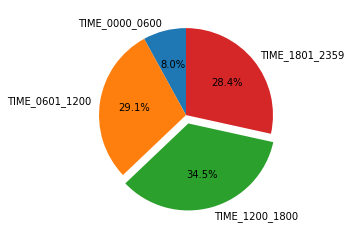

In [57]:
# Time when the total order is high and low for taking better decision based on timing of customer 
# most customer ordering time
a = np.array([sales_data.TIME_0000_0600_ORDERS.sum(),sales_data.TIME_0601_1200_ORDERS.sum(),sales_data.TIME_1200_1800_ORDERS.sum(),sales_data.TIME_1801_2359_ORDERS.sum()])
b =np.array([sales_data.TIME_0000_0600_REVENUE.max(),sales_data.TIME_0601_1200_REVENUE.max(),sales_data.TIME_1200_1800_REVENUE.max(),sales_data.TIME_1801_2359_REVENUE.max()])
print(a,b)
plt.pie(a,labels=['TIME_0000_0600','TIME_0601_1200','TIME_1200_1800','TIME_1801_2359'],startangle =90,autopct='%.1f%%',explode=(0,0,0.1,0))

([<matplotlib.patches.Wedge at 0x7f2aaf315f10>,
 [Text(-0.4166216542977799, 1.0180502920633054, 'TIME_0000_0600'),
  Text(-1.101336432966275, -0.4765060979894401, 'TIME_0601_1200'),
  Text(0.8851615690997432, -0.6530612502582592, 'TIME_1200_1800'),
  Text(0.6705456955266588, 0.8719910952588161, 'TIME_1801_2359')],
 [Text(-0.2272481750715163, 0.5553001593072574, '12.4%'),
  Text(-0.6424462525636604, -0.27796189049384, '38.3%'),
  Text(0.4828154013271326, -0.3562152274135959, '28.5%'),
  Text(0.36575219755999566, 0.47563150650480873, '20.9%')])

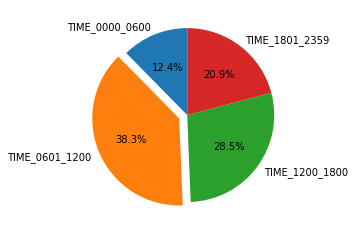

In [62]:
plt.pie(b,labels=['TIME_0000_0600','TIME_0601_1200','TIME_1200_1800','TIME_1801_2359'],startangle =90,autopct='%.1f%%',explode=(0,0.1,0,0))


[ 5144 18731 22170 18307] [ 7700.24 23832.77 17749.01 12995.02]


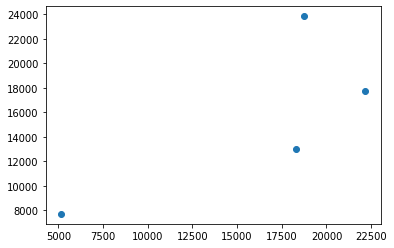

In [23]:
# here we observe that based on revenue time brtween 0601 to 1200 has more potential  
# here we observe that based on revenue time between 0000 to 0600 has less potential 
import matplotlib.pyplot as plt
plt.scatter(a, b)
print(a,b)

# **customers days wise analysis**

In [24]:
sales_data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,timeperiod
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1759 days
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,1303 days
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,1424 days
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,929 days
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,366 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,0,1,0.00,0.00,0.00,117.49,0 days
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0,0,1,0,0.00,0.00,117.49,0.00,0 days


In [25]:
# calculating sum of orders by day wise 
days_order_sum =sales_data[['MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS','THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS']].sum()
days_order_sum

MONDAY_ORDERS        8145
TUESDAY_ORDERS       8772
WEDNESDAY_ORDERS     8990
THURSDAY_ORDERS     10670
FRIDAY_ORDERS        9731
SATURDAY_ORDERS      8417
SUNDAY_ORDERS        9627
dtype: int64

In [26]:
#calculating sum of revenue by days wise
days_revenue_sum = sales_data[['MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE','THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE','SUNDAY_REVENUE']].sum()
days_revenue_sum

MONDAY_REVENUE       1076041.68
TUESDAY_REVENUE      1167552.15
WEDNESDAY_REVENUE    1178446.47
THURSDAY_REVENUE     1329748.98
FRIDAY_REVENUE       1252902.77
SATURDAY_REVENUE     1098210.50
SUNDAY_REVENUE       1304716.65
dtype: float64

In [157]:
days_revenue_sum.max(),days_order_sum.max(),days_revenue_sum.min(),days_order_sum.min()
max_Rev=days_revenue_sum.get(days_revenue_sum==days_revenue_sum.max())
max_Rev=days_revenue_sum.get(days_revenue_sum==days_revenue_sum.min())
print('max Revenue= {}  min Revenue= {}'.format(max_Rev,max_Rev))

max Revenue= MONDAY_REVENUE    1076041.68
dtype: float64  min Revenue= MONDAY_REVENUE    1076041.68
dtype: float64


We observe that the Thurstday has maximum potential 

Here we observe that the Monday has minimum potential 

day wise visualization 

In [87]:
# visualization 
import plotly.express as px
fig = px.scatter(x=days_order_sum, y=days_revenue_sum)
fig.show()

# **customer week wise analysis**

In [29]:
weekly_order_sum = sales_data[['WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS']].sum()
weekly_revenue_sum = sales_data[['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE']].sum()

WEEK1_DAY01_DAY07_ORDERS    14989
WEEK2_DAY08_DAY15_ORDERS    15313
WEEK3_DAY16_DAY23_ORDERS    16150
WEEK4_DAY24_DAY31_ORDERS    17900
dtype: int64


([<matplotlib.patches.Wedge at 0x7f2aa736d390>,
 [Text(-0.7349868194740286, 0.8184096622104678, 'WEEK1_DAY01_DAY07_REVENUE'),
  Text(-0.8821347668092377, -0.6571440125165959, 'WEEK2_DAY08_DAY15_REVENUE'),
  Text(0.6260469414403473, -0.9044695832990662, 'WEEK3_DAY16_DAY23_REVENUE'),
  Text(0.9201732065628498, 0.7702475380835976, 'WEEK4_DAY24_DAY31_REVENUE')],
 [Text(-0.40090190153128824, 0.44640527029661875, '23.29'),
  Text(-0.4811644182595841, -0.35844218864541594, '23.80'),
  Text(0.34148014987655306, -0.4933470454358543, '25.10'),
  Text(0.5367677038283291, 0.4493110638820985, '27.82')])

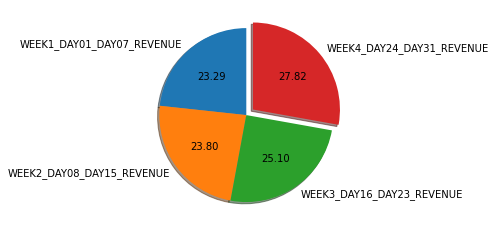

In [138]:
# here we observe that WEEK1_DAY01_DAY07_ORDERS has minimum potential
# heer we observe that WEEK4_DAY24_DAY31_ORDERS has maximum potential
print(weekly_order_sum)
My_labels=['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE'] 
plt.pie(weekly_order_sum,labels=My_labels,autopct='%.2f',startangle=90,explode=(0,0,0,0.1),shadow=True)

here we observe that WEEK1_DAY01_DAY07_REVENUE has minimum potential

here we observe that WEEK4_DAY24_DAY31_REVENUE has maximum potential

WEEK1_DAY01_DAY07_REVENUE    1893191.73
WEEK2_DAY08_DAY15_REVENUE    2032978.67
WEEK3_DAY16_DAY23_REVENUE    2109134.54
WEEK4_DAY24_DAY31_REVENUE    2372314.26
dtype: float64

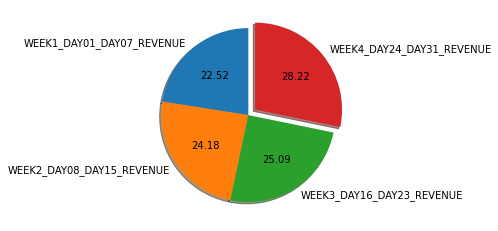

In [139]:
plt.pie(weekly_revenue_sum,labels=My_labels,autopct='%.2f',startangle=90,explode=(0,0,0,0.1),shadow=True)
weekly_revenue_sum

here we observe that WEEK1_DAY01_DAY07 where customer buy less

here we observe that WEEK4_DAY24_DAY31 where customer buy more

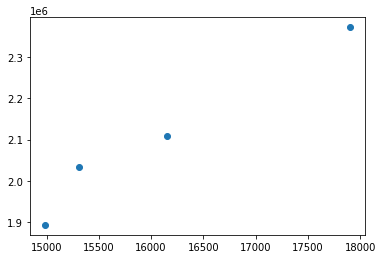

In [98]:

plt.scatter(weekly_order_sum,weekly_revenue_sum)

# **DONE**